## **SCIPY**

SciPy es una librería de Python que proporciona módulos para el análisis estadístico, optimización, álgebra lineal, integración, interpolación y otras tareas científicas y de ingeniería.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Optimización y ajuste**

Optimización es el problema de encontrar una solución numérica a un minimización o igualdad.

El módulo scipy.optimize proporciona algoritmos útiles para la minimización de funciones (escalares o multidimensionales), ajuste de curvas y búsqueda de raices.

In [ ]:
from scipy import optimize

**Ejercicio**

Encontrar los mínimos de una función escalar:

Vamos a definir la siguiente función:

In [ ]:
def f(x):
  return x**2 + 10*np.sin(x)

Graficando la función:

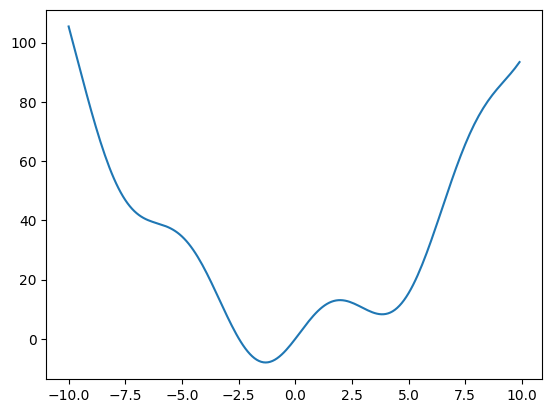

In [ ]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x))
plt.show()

Esta función tiene un mínimo global en torno a -1.3 y un mínimo local en torno a 3.8.

La forma general y eficiente para encontrar el mínimo de esta función es llevar a cabo un descenso de gradiente partiendo de un punto inicial dado. El algoritmo BFGS es una buena manera de hacer esto.

In [ ]:
optimize.fmin_bfgs(f, 0)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 12
         Gradient evaluations: 6


array([-1.30644012])

# **Estadística**

El módulo scipy.stats contiene herramientas estadísticas y probabilísticas descripciones de procesos aleatorios.

Este módulo contiene una gran cantidad de distribuciones de probabilidad, estadísticas resumidas y de frecuencia, funciones de correlación y pruebas estadísticas, estadísticas enmascaradas, estimación de densidad del kernel, funcionalidad cuasi-Monte Carlo y más.

Las estadísticas son un área muy amplia y hay temas que están fuera del alcance de SciPy y están cubiertos por otros paquetes. Algunos de los más importantes son:

statsmodels : regresión, modelos lineales, análisis de series temporales, extensiones a temas también cubiertos por scipy.stats.

Pandas : datos tabulares, funcionalidad de series temporales, interfaces con otros lenguajes estadísticos.

PyMC : modelado estadístico bayesiano, aprendizaje automático probabilístico.

scikit-learn : clasificación, regresión, selección de modelos.

Seaborn : visualización de datos estadísticos.

In [ ]:
from scipy import stats

In [ ]:
#Medidas estadísticas en Numpy y Scipy
import numpy as np
from scipy import stats

# Datos
datos = np.array([4, 49, 19, 4, 14, 20, 17, 50, 4, 20])

# Media
media = np.mean(datos)
print("Media:", media)

# Mediana
mediana = np.median(datos)
print("Mediana:", mediana)

# Desviación estándar
desviacion_estandar = np.std(datos)
print("Desviación estándar:", desviacion_estandar)

# Moda
moda = stats.mode(datos)
print("Moda:",moda)

Media: 20.1
Mediana: 18.0
Desviación estándar: 15.984054554461457
Moda: ModeResult(mode=4, count=3)


**Distribuciones continuas**

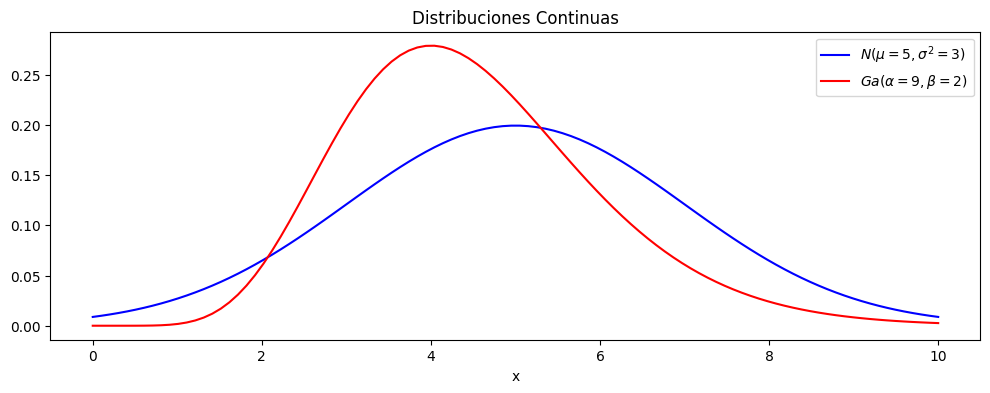

In [ ]:
# Instanciar Distribuciones
N = stats.norm(loc=5, scale=2)
Ga = stats.gamma(a=9, scale=0.5)

# Generar figura
plt.figure(figsize=(12,4))

# Generar puntos
x = np.linspace(0,10, 100)

# Generar probabilidades para Normal y Gamma
plt.plot(x, N.pdf(x), "b", label="$N(\\mu=5, \\sigma^2=3)$")
plt.plot(x, Ga.pdf(x),"r", label="$Ga(\\alpha=9, \\beta=2)$")

# Agregar estilo
plt.title("Distribuciones Continuas")
plt.xlabel("x")
plt.legend()
plt.show()

**Distribuciones discretas**

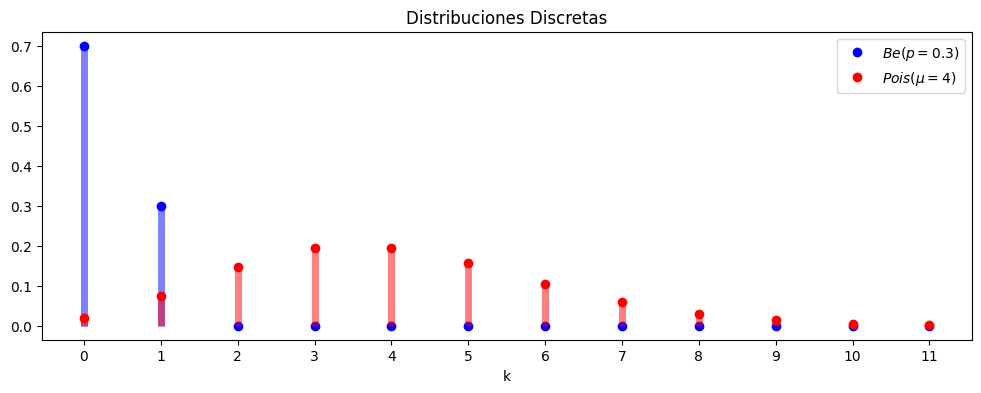

In [ ]:
# Instanciar Distribuciones
Be = stats.bernoulli(p=0.3)
Pois = stats.poisson(mu=4)

# Generar figura
plt.figure(figsize=(12,4))

# Generar puntos
k = np.arange(12)

# Generar probabilidades para Bernoulli
plt.plot(k, Be.pmf(k), "bo", label="$Be(p=0.3)$")
plt.vlines(k, 0, Be.pmf(k), colors='b', lw=5, alpha=0.5)

# Generar probabilidades para Poisson
plt.plot(k, Pois.pmf(k), "ro", label="$Pois(\\mu=4)$")
plt.vlines(k, 0, Pois.pmf(k), colors='r', lw=5, alpha=0.5)

# Agregar estilo
plt.title("Distribuciones Discretas")
plt.xlabel("k")
plt.xticks(k)
plt.legend()
plt.show();

**Distribuciones no paramétricas**

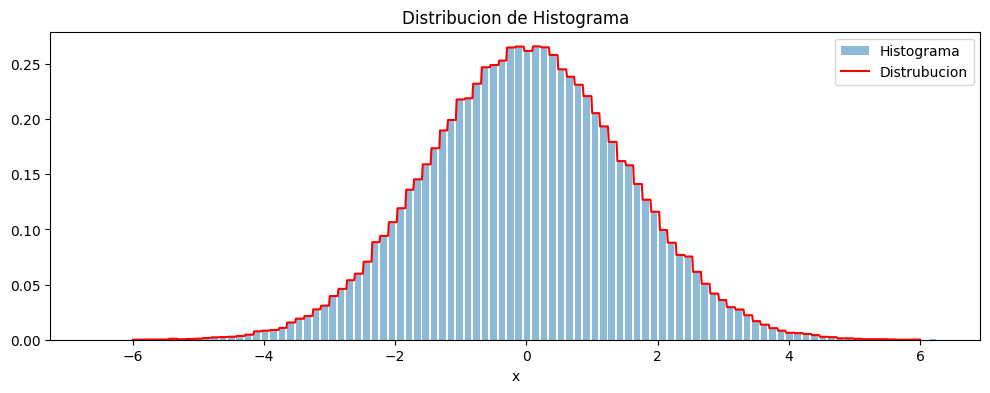

In [ ]:
# Generar datos
data = stats.norm.rvs(size=100000, loc=0, scale=1.5, random_state=123)

# Generar histogramas
bins = 100
hist = np.histogram(data, bins=bins)

# Generar distribucion
hist_dist = stats.rv_histogram(hist)

# Generar figura
plt.figure(figsize=(12,4))

# Graficar histograma
plt.hist(data, density=True, bins=bins, alpha=0.5,label="Histograma", width=0.1);

# Generar probabilidades
x = np.linspace(-6, 6, 1000)
plt.plot(x, hist_dist.pdf(x), "r-", label="Distrubucion")

# Agregar estilo
plt.legend()
plt.title("Distribucion de Histograma")
plt.xlabel("x")
plt.show();

**Variables aleatorias**

Al instanciar las distribuciones, en realidad estaremos instanciado una clase del tipo rv_froze, la cual representa a una Variable Aleatoria (Random Variable).

scipy.stats._distn_infrastructure.rv_frozen

Podemos utilizar esta clase para generar muestras aleatorias que se sigan una cierta regla. Por ejemplo:

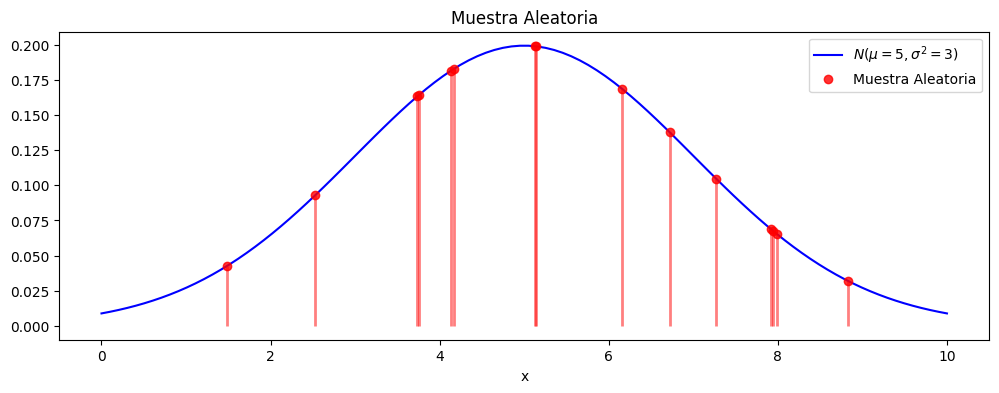

In [ ]:
# Tamaño de muestra
n = 15

# Generar Muestra a partir de la distribucion N(5,2)
X_n = N.rvs(size=n)

# Generar figura
plt.figure(figsize=(12,4))

# Generar puntos
x = np.linspace(0,10, 100)

# Generar probabilidades para Normal y Gamma
plt.plot(x, N.pdf(x), "b", label="$N(\\mu=5, \\sigma^2=3)$")
plt.plot(X_n, N.pdf(X_n), "ro", label="Muestra Aleatoria", alpha=0.8)
plt.vlines(X_n, 0, N.pdf(X_n), colors='r', lw=2, alpha=0.5)

# Agregar estilo
plt.title("Muestra Aleatoria")
plt.xlabel("x")
plt.legend()
plt.show()

**Propiedades:**

Podemos utilizar las variables aleatorias para calcular distintas propiedades de la distribución.

In [ ]:
print("Gamma(alpha=9, beta=2)")
print("\tMedia:", Ga.mean())
print("\tMediana:", Ga.median())
print("\tDesviacion Estandar", Ga.std())
print("\tEsperanza:", Ga.expect())
print("\tVarianza:", Ga.var())

Gamma(alpha=9, beta=2)
	Media: 4.5
	Mediana: 4.334475592185185
	Desviacion Estandar 1.5
	Esperanza: 4.499999999999897
	Varianza: 2.25
